In [102]:
import scipy.stats as sps
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

from prettytable import PrettyTable

### lab 1

In [103]:
data = [0.414, 0.011, 0.666, -1.132, -0.410, -1.077, 1.484, -0.340, 0.789, -0.494, 0.364, -1.237, -0.044,
        -0.111, -0.210, 0.931, 0.616, -0.377, -0.433, 1.048, -
        0.037, 0.759, 0.609, -2.043, -2.290, 0.404,
        -0.543, 0.486, 0.869, 0.347, 2.816, -0.464, -0.632, -
        1.614, 0.372, -0.074, -0.916, 1.314, -0.038,
        0.673, 0.563, -0.107, 0.131, -1.808, 0.284, 0.458, 1.307, -
        1.625, -0.629, -0.504, -0.0056, -0.131,
        0.048, 1.879, -1.016, 0.360, -0.119, 2.331, 1.672, -
        1.053, 0.840, 0.246, -0.237, -1.312, 1.603, -0.952,
        -0.566, 1.600, 0.465, 1.951, 0.110, 0.251, 0.116, -
        0.957, -0.190, 1.479, -0.986, 1.249, 1.934, 0.070,
        -1.358, -1.246, -0.959, -1.297, -0.722, 0.925, 0.783, -
        0.402, 0.619, 1.826, 1.272, -0.945, 0.494, 0.050,
        -1.696, 1.876, 0.063, 0.132, 0.682, 0.544, -0.417, -
        0.666, -0.104, -0.253, -2.543, -1.133, 1.987, 0.668,
        0.360, 1.927, 1.183, 1.211, 1.765, 0.035, -0.359, 0.193, -
        1.023, -0.222, -0.616, -0.060, -1.319, -0.785,
        -0.430, -0.298, 0.248, -0.088, -1.379, 0.295, -0.115, -
        0.621, -0.618, 0.209, 0.979, 0.906, -0.096, -1.376,
        1.047, -0.872, -2.200, -1.384, 1.425, -0.812, 0.748, -1.095]


In [104]:
# мой порядковый номер - 14
sn = 14
data = data[(4*sn-1):(4*sn+100)]
data

[0.36,
 -0.119,
 2.331,
 1.672,
 -1.053,
 0.84,
 0.246,
 -0.237,
 -1.312,
 1.603,
 -0.952,
 -0.566,
 1.6,
 0.465,
 1.951,
 0.11,
 0.251,
 0.116,
 -0.957,
 -0.19,
 1.479,
 -0.986,
 1.249,
 1.934,
 0.07,
 -1.358,
 -1.246,
 -0.959,
 -1.297,
 -0.722,
 0.925,
 0.783,
 -0.402,
 0.619,
 1.826,
 1.272,
 -0.945,
 0.494,
 0.05,
 -1.696,
 1.876,
 0.063,
 0.132,
 0.682,
 0.544,
 -0.417,
 -0.666,
 -0.104,
 -0.253,
 -2.543,
 -1.133,
 1.987,
 0.668,
 0.36,
 1.927,
 1.183,
 1.211,
 1.765,
 0.035,
 -0.359,
 0.193,
 -1.023,
 -0.222,
 -0.616,
 -0.06,
 -1.319,
 -0.785,
 -0.43,
 -0.298,
 0.248,
 -0.088,
 -1.379,
 0.295,
 -0.115,
 -0.621,
 -0.618,
 0.209,
 0.979,
 0.906,
 -0.096,
 -1.376,
 1.047,
 -0.872,
 -2.2,
 -1.384,
 1.425,
 -0.812,
 0.748,
 -1.095]

In [105]:
min_x = sorted(data)[0]
max_x = sorted(data)[len(data)-1]

n = len(data)
# размах варьирования R
r = float('%.3f' % (max_x - min_x))
# длина частичного интервала через формулу Стерджеса
h = float('%.3f' % (r/(1+3.322*math.log(n))))

print(f"min_x = {min_x}")
print(f"max_x = {max_x}")

print(f"размах варьирования R = {r}")
print(f"длина частичного интервала = {h}")


min_x = -2.543
max_x = 2.331
размах варьирования R = 4.874
длина частичного интервала = 0.306


In [106]:
start_x = float('%.3f' % (min_x - 0.5*h))
end_x = start_x

intervals = []

while end_x <= max_x:
    end_x += h
    if end_x - h > max_x:
        break
    intervals.append([float('%.3f' % (end_x - h)), float('%.3f' % end_x), 0, 0, 0, 0])

intervals


[[-2.696, -2.39, 0, 0, 0, 0],
 [-2.39, -2.084, 0, 0, 0, 0],
 [-2.084, -1.778, 0, 0, 0, 0],
 [-1.778, -1.472, 0, 0, 0, 0],
 [-1.472, -1.166, 0, 0, 0, 0],
 [-1.166, -0.86, 0, 0, 0, 0],
 [-0.86, -0.554, 0, 0, 0, 0],
 [-0.554, -0.248, 0, 0, 0, 0],
 [-0.248, 0.058, 0, 0, 0, 0],
 [0.058, 0.364, 0, 0, 0, 0],
 [0.364, 0.67, 0, 0, 0, 0],
 [0.67, 0.976, 0, 0, 0, 0],
 [0.976, 1.282, 0, 0, 0, 0],
 [1.282, 1.588, 0, 0, 0, 0],
 [1.588, 1.894, 0, 0, 0, 0],
 [1.894, 2.2, 0, 0, 0, 0],
 [2.2, 2.506, 0, 0, 0, 0]]

In [107]:
def between(element):
    for i in range(len(intervals)):
        if intervals[i][0] <= element and element < intervals[i][1]:
            intervals[i][2] += 1
            break
 

In [108]:
for i in range(n):
    between(data[i])


In [109]:
sum_frequency = 0
sum_relative = 0

for i in range(len(intervals)):
    sum_frequency += intervals[i][2]

for i in range(len(intervals)):
    intervals[i][3] = float('%.4f' % (intervals[i][2] / sum_frequency))

    if i == 0:
        intervals[i][5] = 0
    else:
        intervals[i][5] = float('%.4f' % sum_relative)

    
    
    sum_relative += intervals[i][3]

    intervals[i][4] = float('%.3f' % (intervals[i][3] / h))


In [110]:
taLab1 = PrettyTable()
taLab1.field_names = ["start", "end", "frequency", "relative f.", "f(x)", "F(x)"]

for i in range(len(intervals)):
    taLab1.add_row([intervals[i][0], intervals[i][1], intervals[i][2],
               intervals[i][3], intervals[i][4], intervals[i][5]])

taLab1.add_row([" ", " ", sum_frequency, float('%.4f' %
           sum_relative), " ", float('%.4f' % sum_relative)])

taLab1


start,end,frequency,relative f.,f(x),F(x)
-2.696,-2.39,1,0.0112,0.037,0
-2.39,-2.084,1,0.0112,0.037,0.0112
-2.084,-1.778,0,0.0,0.0,0.0224
-1.778,-1.472,1,0.0112,0.037,0.0224
-1.472,-1.166,8,0.0899,0.294,0.0336
-1.166,-0.86,10,0.1124,0.367,0.1235
-0.86,-0.554,8,0.0899,0.294,0.2359
-0.554,-0.248,6,0.0674,0.22,0.3258
-0.248,0.058,11,0.1236,0.404,0.3932
0.058,0.364,13,0.1461,0.477,0.5168


In [111]:
horisontal = []
vertical   = []
for i in range(len(intervals)):
    horisontal.append(intervals[i][0])
    vertical.append(intervals[i][5])



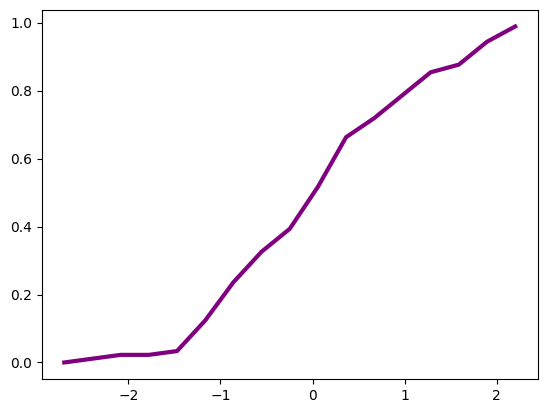

In [112]:
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(horisontal, vertical, linewidth=3, color="purple")

plt.show()


### lab 2

In [113]:
taLab2 = PrettyTable()
taLab2.field_names = ["x_i*", "n_i", "x_i* * n_i", "x_i* - x`",
                      "(x_i* - x`)^2", "(x_i* - x`)^2 * n_i", "(x_i* - x`)^3 * n_i", "(x_i* - x`)^4 * n_i"]

x_i_n_i_sum = 0

for i in range(len(intervals)):
    x_i = float('%.3f' % ((intervals[i][0] + intervals[i][1]) / 2))
    x_i_n_i = float('%.3f' % (x_i * intervals[i][2]))
    x_i_n_i_sum += x_i_n_i

    taLab2.add_row([x_i, intervals[i][2], x_i_n_i, 0, 0, 0, 0, 0])
not_x = (1 / n) * x_i_n_i_sum

taLab2


x_i*,n_i,x_i* * n_i,x_i* - x`,(x_i* - x`)^2,(x_i* - x`)^2 * n_i,(x_i* - x`)^3 * n_i,(x_i* - x`)^4 * n_i
-2.543,1,-2.543,0,0,0,0,0
-2.237,1,-2.237,0,0,0,0,0
-1.931,0,-0.0,0,0,0,0,0
-1.625,1,-1.625,0,0,0,0,0
-1.319,8,-10.552,0,0,0,0,0
-1.013,10,-10.13,0,0,0,0,0
-0.707,8,-5.656,0,0,0,0,0
-0.401,6,-2.406,0,0,0,0,0
-0.095,11,-1.045,0,0,0,0,0
0.211,13,2.743,0,0,0,0,0


In [114]:
not_x

0.052842696629213495

In [115]:
S_2_sum  = 0
_S_2_sum = 0
_m_3_sum = 0
_m_4_sum = 0

for i in range(len(intervals)):
    taLab2.rows[i][3] = float('%.3f' % (taLab2.rows[i][0] - not_x))
    taLab2.rows[i][4] = float('%.3f' % (taLab2.rows[i][3]**2))
    taLab2.rows[i][5] = float('%.3f' % (taLab2.rows[i][4] * intervals[i][2]))
    taLab2.rows[i][6] = float('%.3f' % (taLab2.rows[i][3]**3 * intervals[i][2]))
    taLab2.rows[i][7] = float('%.3f' % (taLab2.rows[i][3]**4 * intervals[i][2]))

    S_2_sum  += taLab2.rows[i][4]
    _S_2_sum += taLab2.rows[i][5]
    _m_3_sum += taLab2.rows[i][6]
    _m_4_sum += taLab2.rows[i][7]

taLab2


x_i*,n_i,x_i* * n_i,x_i* - x`,(x_i* - x`)^2,(x_i* - x`)^2 * n_i,(x_i* - x`)^3 * n_i,(x_i* - x`)^4 * n_i
-2.543,1,-2.543,-2.596,6.739,6.739,-17.495,45.417
-2.237,1,-2.237,-2.29,5.244,5.244,-12.009,27.501
-1.931,0,-0.0,-1.984,3.936,0.0,-0.0,0.0
-1.625,1,-1.625,-1.678,2.816,2.816,-4.725,7.928
-1.319,8,-10.552,-1.372,1.882,15.056,-20.661,28.347
-1.013,10,-10.13,-1.066,1.136,11.36,-12.114,12.913
-0.707,8,-5.656,-0.76,0.578,4.624,-3.512,2.669
-0.401,6,-2.406,-0.454,0.206,1.236,-0.561,0.255
-0.095,11,-1.045,-0.148,0.022,0.242,-0.036,0.005
0.211,13,2.743,0.158,0.025,0.325,0.051,0.008


In [116]:
_S_2_ = _S_2_sum / n
S_2 = S_2_sum / (n - 1)
S = S_2**0.5
_m_3_ = _m_3_sum / n
_m_4_ = _m_4_sum / n

sum_freq_2 = 0
if len(intervals) // 2 == 0:
    median = len(intervals) // 2 - 1
else:
    median = len(intervals) // 2 

for i in range(median):
    sum_freq_2 += intervals[i][2]
Me = intervals[median][0] + h * ((((n + 1) / 2) - sum_freq_2) / taLab1.rows[median][2])
Mo = intervals[median][0] + h * ((intervals[median][2] - intervals[median-1][2]) / ((intervals[median][2] - intervals[median-1][2]) + (intervals[median][2] - intervals[median+1][2])))
A = _m_3_ / S**3
E = _m_4_ / S**4 - 3
V = S / not_x



In [117]:
print(f"_m_3_ = {_m_3_}")
print(f"_m_4_ = {_m_4_}")
print(f"_S_2_ = {_S_2_}")
print(f"S_2   = {S_2}")
print(f"S     = {S}")
print(f"Me    = {Me}")
print(f"Mo    = {Mo}")
print(f"A     = {A}")
print(f"E     = {E}")
print(f"V     = {V}")

_m_3_ = 0.19851685393258417
_m_4_ = 3.175898876404494
_S_2_ = 1.138550561797753
S_2   = 0.4383522727272727
S     = 0.6620817719340056
Me    = 0.030181818181818143
Mo    = 0.262
A     = 0.6840100615123571
E     = 13.527993769534419
V     = 12.529295705321388


### lab 3

#### 1

In [118]:
# alpha = 0.1

$H_0:X=N(\bar{x};S)$

##### Критерий согласия Пирса

В качестве меры расхождения эмпирического и теоретического законов принимается величина

$$\chi^2=\sum_{i=1}^v {\frac{(n_i-n\cdot p_i^{теор})^2}{n\cdot p_i^{теор}}}$$

которая имеет $\chi^2$ распределение с числом степеней свободы $k=v−l−1$, где $v$ - число (новое) групп вариационного ряда; $l$ – число неизвестных параметров предполагаемой модели, оцениваемых по результатам наблюдений (если все параметры предполагаемого закона известны точно, то $l=0$).

$$p_i^{теор}=P(x_{нач}<X<x_{кон})=\Phi(\frac{x_{кон}-a}{\sigma})-\Phi(\frac{x_{нач}-a}{\sigma})$$

$a=\bar{x}$

$n_i^{теор}\geqslant 5$

In [125]:
taLab3 = PrettyTable()
taLab3.field_names = ["start", "end", "frequency", "p_i", "n*p_i", "formula"]

formula_sum = 0
sum_freq_sub = 0
sum_n_pi = 0
v = 0

for i in range(len(intervals)):
    p_i = float('%.4f' % ((sps.norm.cdf(
        (intervals[i][1]-not_x)/S) - 0.5) - (sps.norm.cdf((intervals[i][0]-not_x)/S) - 0.5)))
    if i == 0:
        p_i = float('%.4f' %
                    ((sps.norm.cdf((intervals[i][1]-not_x)/S) - 0.5) + 0.5))
    if i == len(intervals)-1:
        p_i = float('%.4f' %
                    (0.5 - (sps.norm.cdf((intervals[i][0]-not_x)/S) - 0.5)))

    sum_freq_sub += intervals[i][2]
    sum_n_pi += sum_frequency*p_i
    if sum_freq_sub >= 5:
        formula = float('%.4f' % ((sum_freq_sub - sum_n_pi)**2 / (sum_n_pi)))
        formula_sum += formula
        sum_freq_sub = 0
        sum_n_pi = 0
        v += 1
    else:
        formula = 0

    taLab3.add_row([intervals[i][0], intervals[i][1],
                   intervals[i][2], p_i, float('%.3f' % (sum_frequency*p_i)), formula])

taLab3.add_row([" ", " ", sum_frequency, float('%.4f' %
                                               sum_relative), " ", float('%.4f' % formula_sum)])

taLab3


start,end,frequency,p_i,n*p_i,formula
-2.696,-2.39,1,0.0001,0.009,0
-2.39,-2.084,1,0.0005,0.044,0
-2.084,-1.778,0,0.0022,0.196,0
-1.778,-1.472,1,0.0078,0.694,0
-1.472,-1.166,8,0.0222,1.976,22.3689
-1.166,-0.86,10,0.0512,4.557,6.502
-0.86,-0.554,8,0.0957,8.517,0.0314
-0.554,-0.248,6,0.1451,12.914,3.7016
-0.248,0.058,11,0.1783,15.869,1.4938
0.058,0.364,13,0.1777,15.815,0.5012


В результате расчетов получили значение критерия

$$\chi^2=\sum_{i=1}^v {\frac{(n_i-n\cdot p_i^{теор})^2}{n\cdot p_i^{теор}}}=146.2062$$

In [127]:
l = 2
alpha = 0.1
y = 1 - alpha
k = v - l - 1

In [129]:
print(f"y     = {y}")
print(f"k     = {k}")

y     = 0.9
k     = 8


In [134]:
Xyk_2 = sps.chi2.ppf(y, k)


13.36156613651173

In [139]:
print(f"Xyk_2  = {Xyk_2}")

Xyk_2  = 13.36156613651173


Так как статистика Пирсона измеряет разницу между эмпирическим и теоретическим распределениями, то чем больше ее наблюдаемое значение $\chi_{набл}^2$, тем сильнее довод против основной гипотезы.
Поэтому критическая область для этой статистики всегда правосторонняя: $[\chi_{\gamma;k}^2;+∞)$.

**Вывод**: гипотеза опровергается, поскольку $\chi_{набл}^2=146.2062$ попадает в критическую область $\chi_{\gamma;k}^2=13.3616$

#### 2

In [120]:
# вариант 4
n1 = 8
n2 = 17
S1_2 = 73.4
S2_2 = 49.7

$F_{наб}=\frac{{S_Б}^2}{{S_M}^2}$
> $F_{наб}$ - выборочная характеристика (статистика)

> ${S_Б}^2$ - большая из двух оценок дисперсии

> ${S_M}^2$ - меньшая из двух оценок дисперсии

In [121]:
# проведем проверку по F-критерию

if S1_2 >= S2_2:
    Smax_2 = S1_2
    Smin_2 = S2_2

    m1 = n1 - 1
    m2 = n2 - 1
else:
    Smax_2 = S2_2
    Smin_2 = S1_2

    m1 = n2 - 1
    m2 = n1 - 1

F = Smax_2 / Smin_2


In [122]:
print(f"F      = {F}")
print(f"Smax_2 = {Smax_2}")
print(f"Smin_2 = {Smin_2}")
print(f"m1     = {m1}")
print(f"m2     = {m2}")

F      = 1.4768611670020122
Smax_2 = 73.4
Smin_2 = 49.7
m1     = 7
m2     = 16


$F_{кр}=F(\frac{\alpha}{2}=0.5\alpha;m_1;m_2)$
> $F_{кр}$ - критическое значение точного или приближенного распределения СВ

https://math.semestr.ru/corel/table-fisher.php

In [123]:
# alpha = 0.1
# ищем по таблице для значений 0.05;7;16
F_ = 2.66

In [124]:
F < F_

True

Т.к. $F_{наб}<F_{кр}$, то нет основания считать, что точность работы предприятий разная.

### lab 4